# Questrade Custom API Wrapper Examples

This notebook demonstrates how to use the Questrade Custom API Wrapper for various common tasks.

In [15]:
import sys
from pathlib import Path
import datetime
from datetime import timedelta
import pandas as pd
import matplotlib.pyplot as plt

# Add project root to path
project_root = Path('..').resolve()
sys.path.append(str(project_root))
print(f"Project root: {project_root}")

Project root: C:\Users\yaloo\QuestradeCustomWrapper


## 1. Authentication and Setup

First, let's initialize the API wrapper. You can provide a refresh token directly, or let the wrapper use a saved token file.

In [16]:
from QuestradeAPI.CustomWrapper import QuestradeAPI

# Method 1: Use saved token (will prompt for token if none exists)
api = QuestradeAPI()

# Method 2: Provide refresh token directly
# api = QuestradeAPI(refresh_token="your_refresh_token_here")

# Method 3: Specify custom token file path
# api = QuestradeAPI(token_path="/path/to/token.json")

print("API initialized successfully!")

API initialized successfully!


## 2. Account Information

Let's retrieve basic account information.

In [3]:
# Get all accounts
accounts = api.get_accounts()
print(f"Found {len(accounts['accounts'])} accounts")

# Select the first account for further examples
if accounts['accounts']:
    account = accounts['accounts'][0]
    account_id = account['number']
    print(f"Using account: {account_id} ({account['type']})")    
else:
    print("No accounts found!")

Found 4 accounts
Using account: 27955569 (Margin)


In [4]:
# Get account balances
balances = api.get_account_balances(account_id)

# Display combined balances
combined = balances['combinedBalances']
for balance in combined:
    print(f"Currency: {balance['currency']}")
    print(f"  Cash: ${balance['cash']:.2f}")
    print(f"  Market Value: ${balance['marketValue']:.2f}")
    print(f"  Total Equity: ${balance['totalEquity']:.2f}")

Currency: CAD
  Cash: $66.44
  Market Value: $0.00
  Total Equity: $66.44
Currency: USD
  Cash: $46.29
  Market Value: $0.00
  Total Equity: $46.29


In [5]:
# Get account positions
positions = api.get_account_positions(account_id)

# Create a DataFrame for better visualization
if positions['positions']:
    positions_df = pd.DataFrame(positions['positions'])
    
    # Select and format key columns
    display_cols = ['symbol', 'openQuantity', 'currentPrice', 'currentMarketValue', 'averageEntryPrice']
    positions_df = positions_df[display_cols].copy()
    
    # Calculate profit/loss
    positions_df['profit_loss'] = positions_df['currentPrice'] - positions_df['averageEntryPrice']
    positions_df['profit_loss_pct'] = (positions_df['profit_loss'] / positions_df['averageEntryPrice']) * 100
    
    # Format for display
    positions_df['profit_loss'] = positions_df['profit_loss'].map('${:.2f}'.format)
    positions_df['profit_loss_pct'] = positions_df['profit_loss_pct'].map('{:.2f}%'.format)
    
    display(positions_df)
else:
    print("No positions found in this account.")

No positions found in this account.


## 3. Account Activities and Executions

In [6]:
# Get account activities for the last 30 days
end_time = datetime.datetime.now().strftime("%Y-%m-%dT%H:%M:%S.000000-05:00")
start_time = (datetime.datetime.now() - timedelta(days=30)).strftime("%Y-%m-%dT%H:%M:%S.000000-05:00")

activities = api.get_account_activities(account_id, start_time, end_time)

if activities['activities']:
    activities_df = pd.DataFrame(activities['activities'])
    print(f"Found {len(activities_df)} activities in the last 30 days")
    
    # Display the most recent activities
    display(activities_df.head())
else:
    print("No activities found in the specified date range.")

Found 1 activities in the last 30 days


,tradeDate,transactionDate,settlementDate,action,symbol,symbolId,description,currency,quantity,price,grossAmount,commission,netAmount,type
0,2025-03-17T00:00:00.000000-04:00,2025-03-17T00:00:00.000000-04:00,2025-03-17T00:00:00.000000-04:00,,,0,INT FR 02/16 THRU03/15@12 % BAL 743 ...,USD,0,0,0,0,-6.84,Interest


In [7]:
# Get recent executions
executions = api.get_account_executions(account_id)

if executions['executions']:
    executions_df = pd.DataFrame(executions['executions'])
    print(f"Found {len(executions_df)} recent executions")
    display(executions_df)
else:
    print("No recent executions found.")

No recent executions found.


## 4. Market Data

Now let's explore market data functionality.

In [8]:
# Search for symbols
search_term = "AAPL"
search_results = api.search_symbols(search_term)

if search_results['symbols']:
    symbols_df = pd.DataFrame(search_results['symbols'])
    display(symbols_df)
    
    # Save the first symbol ID for later use
    symbol_id = search_results['symbols'][0]['symbolId']
    symbol_name = search_results['symbols'][0]['symbol']
    print(f"Using symbol: {symbol_name} (ID: {symbol_id})")
else:
    print(f"No symbols found for '{search_term}'")

,symbol,symbolId,description,securityType,listingExchange,isTradable,isQuotable,currency
0,AAPL,8049,APPLE INC,Stock,NASDAQ,True,True,USD
1,AAPL.TO,39472334,APPLE INC,Stock,TSX,True,True,CAD
2,AVSPY.IN,28301,AAPL Alpha Index,Index,NASDAQI,False,True,USD
3,AAPW,59883807,ROUNDHILL AAPL WEEKLYPAY ETF,Stock,BATS,True,True,USD
4,AAPL.TO,37727146,APPLE INC CDR (CAD HEDGED) DEPOSITARY RECEIPTS...,Stock,NEO,False,False,CAD
5,NY2LAAPL.IN,19786673,ICE Leveraged 2x AAPL Index,Index,NYSEGIF,False,True,USD
6,APLY,47195488,TIDAL TRUST II YIELDMAX AAPL OPTION INCOME STR...,Stock,ARCA,True,True,USD
7,AAPB,43621933,GRANITESHARES ETF TRUST 2X LONG AAPL DAILY ETF,Stock,NASDAQ,True,True,USD
8,AAPD,43621934,DIREXION SHARES ETF TRUST DAILY AAPL BEAR 1X SHS,Stock,NASDAQ,True,True,USD
9,AAPU,43621935,DIREXION SHARES ETF TRUST DAILY AAPL BULL 2X S...,Stock,NASDAQ,True,True,USD


Using symbol: AAPL (ID: 8049)


In [12]:
# Get symbol quotes
quotes = api.get_quotes([symbol_id])

if quotes['quotes']:
    quote = quotes['quotes'][0]
    print(f"Quote for {quote['symbol']}:")
    print(f"  Bid: ${quote['bidPrice']:.2f} ({quote['bidSize']} shares)")
    print(f"  Ask: ${quote['askPrice']:.2f} ({quote['askSize']} shares)")
    print(f"  Last: ${quote['lastTradePrice']:.2f}")
    print(f"  Volume: {quote['volume']}")
else:
    print("No quotes found.")

API token expired. Refreshing token and retrying...
Authentication failed: Bad Request


QuestradeGeneralError: Questrade API Error 1017: Access token is invalid

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12232\2468339644.py:21: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise a warning unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  candles_df['start'] = pd.to_datetime(candles_df['start'])


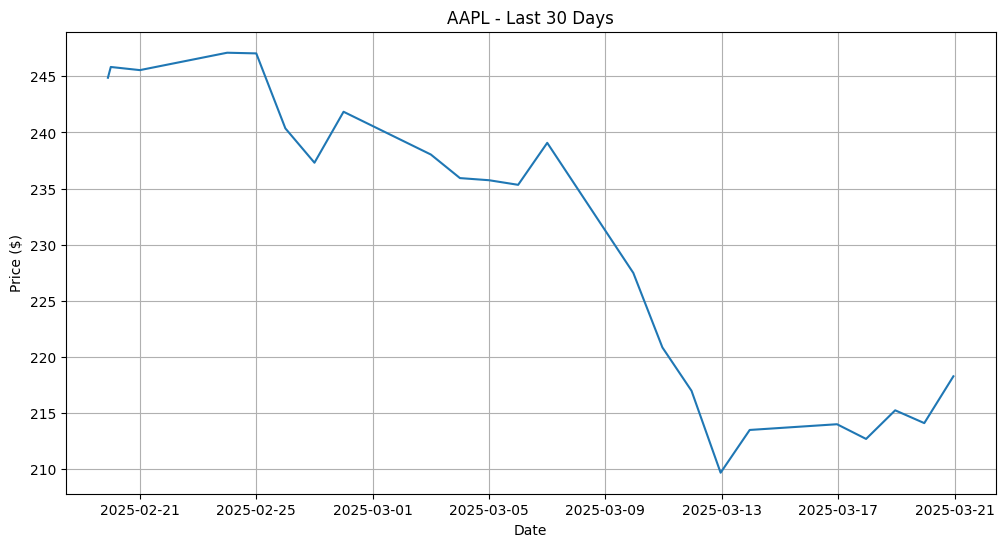

,end,low,high,open,close,volume,VWAP
start,,,,,,,
2025-02-19 21:38:16-05:00,2025-02-20T00:00:00.000000-05:00,243.1604,246.01,244.660,244.87,32204215,244.698606
2025-02-20 00:00:00-05:00,2025-02-21T00:00:00.000000-05:00,244.2900,246.78,244.940,245.83,32316907,245.643959
2025-02-21 00:00:00-05:00,2025-02-22T00:00:00.000000-05:00,245.2200,248.69,245.950,245.55,53197431,246.387753
2025-02-24 00:00:00-05:00,2025-02-25T00:00:00.000000-05:00,244.4200,248.86,244.925,247.10,51326396,247.304074
2025-02-25 00:00:00-05:00,2025-02-26T00:00:00.000000-05:00,244.9100,250.00,248.000,247.04,48013272,247.547272


In [10]:
# Get historical data (candles)
end_time = datetime.datetime.now()
start_time = end_time - timedelta(days=30)

# Format dates in ISO 8601 format with timezone
start_time_str = start_time.strftime("%Y-%m-%dT%H:%M:%S.000-05:00")
end_time_str = end_time.strftime("%Y-%m-%dT%H:%M:%S.000-05:00")

candles = api.get_candles(
    symbol_id=symbol_id,
    start_time=start_time_str,
    end_time=end_time_str,
    interval="OneMinute"
)

if candles['candles']:
    # Convert to DataFrame
    candles_df = pd.DataFrame(candles['candles'])
    
    # Convert start to datetime
    candles_df['start'] = pd.to_datetime(candles_df['start'])
    
    # Set start as index
    candles_df.set_index('start', inplace=True)
    
    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(candles_df.index, candles_df['close'])
    plt.title(f"{symbol_name} - Last 30 Days")
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.grid(True)
    plt.show()
    
    # Display the data
    display(candles_df.head())
else:
    print("No candles data found.")

## 5. Options Data

Let's explore options data for a symbol.

In [13]:
# Get option chain
options = api.get_symbol_options(symbol_id)

if options and 'options' in options:
    # Get available expiry dates
    expiry_dates = [option['expiryDate'] for option in options['options']]
    print(f"Available expiry dates for {symbol_name}:")
    for date in expiry_dates:
        print(f"  {date}")
    
    # Select the first expiry date for demonstration
    if expiry_dates:
        selected_date = expiry_dates[0]
        print(f"\nSelected expiry date: {selected_date}")
        
        # Get options for this expiry date
        selected_option = next((opt for opt in options['options'] if opt['expiryDate'] == selected_date), None)
        
        if selected_option and 'chainPerRoot' in selected_option:
            chains = selected_option['chainPerRoot']
            if chains:
                # Extract calls and puts
                calls = []
                puts = []
                
                for root in chains:
                    for strike in root['chainPerStrikePrice']:
                        strike_price = strike['strikePrice']
                        
                        if 'callSymbolId' in strike:
                            calls.append({
                                'strikePrice': strike_price,
                                'symbolId': strike['callSymbolId'],
                                'type': 'CALL'
                            })
                            
                        if 'putSymbolId' in strike:
                            puts.append({
                                'strikePrice': strike_price,
                                'symbolId': strike['putSymbolId'],
                                'type': 'PUT'
                            })
                
                # Create DataFrames
                calls_df = pd.DataFrame(calls)
                puts_df = pd.DataFrame(puts)
                
                print(f"\nFound {len(calls_df)} calls and {len(puts_df)} puts")
                
                # Display a few calls and puts
                print("\nSample Calls:")
                display(calls_df.head())
                
                print("\nSample Puts:")
                display(puts_df.head())
                
                # Get quotes for a few options
                if len(calls_df) > 0:
                    call_id = calls_df.iloc[len(calls_df)//2]['symbolId']  # Middle strike call
                    call_quotes = api.get_quotes([call_id])
                    
                    if call_quotes['quotes']:
                        print("\nSample Call Option Quote:")
                        quote = call_quotes['quotes'][0]
                        print(f"Symbol: {quote['symbol']}")
                        print(f"Bid: ${quote['bidPrice']:.2f}, Ask: ${quote['askPrice']:.2f}")
                        print(f"Last: ${quote['lastTradePrice']:.2f}, Volume: {quote['volume']}")
            else:
                print("No option chain data found for the selected date.")
        else:
            print("No option chain data found for the selected date.")
else:
    print("No option chain data found.")

No option chain data found.


## 6. Order Management

Let's explore order management functionality. Note: This section includes examples of creating orders but they are commented out to prevent accidental order placement.

In [14]:
# Get open orders
orders = api.get_account_orders(account_id, state="Open")

if orders['orders']:
    orders_df = pd.DataFrame(orders['orders'])
    print(f"Found {len(orders_df)} open orders")
    display(orders_df)
else:
    print("No open orders found.")

No open orders found.


## 7. Error Handling Examples

Let's demonstrate how to handle errors with the wrapper.

In [15]:
from QuestradeAPI.CustomWrapper import (
    QuestradeAPIError, 
    QuestradeGeneralError, 
    QuestradeOrderError,
    QuestradeRateLimitError
)

# Example of handling a non-existent account
try:
    invalid_account = "12345678"  # This account ID doesn't exist
    positions = api.get_account_positions(invalid_account)
except QuestradeGeneralError as e:
    print(f"General error: {e.code} - {e.message}")
    print(f"HTTP status: {e.status_code}")
except QuestradeAPIError as e:
    print(f"API error: {e.code} - {e.message}")

General error: 1018 - Account number not found
HTTP status: 404


## 8. Advanced Usage: Rate Limiting Configuration

In [16]:
# Create API with custom rate limiting settings
custom_api = QuestradeAPI(
    enforce_rate_limit=True,  # Enable rate limiting
    max_retries=5             # Set maximum retry attempts
)

print("API initialized with custom rate limiting settings")
print(f"Rate limiting enabled: {custom_api.enforce_rate_limit}")
print(f"Maximum retries: {custom_api.max_retries}")

API initialized with custom rate limiting settings
Rate limiting enabled: True
Maximum retries: 5


## 9. Summary

This notebook demonstrated the key features of the Questrade Custom API Wrapper:

1. Authentication and setup
2. Account information retrieval
3. Market data access
4. Options data
5. Order management
6. Error handling
7. Rate limiting configuration

For more information, refer to the documentation or explore the API methods directly.

# Chronos section

In [33]:
import sqlite3
import os
from pathlib import Path
import sys

In [34]:
# Add project root to path
project_root = Path('..').resolve()
sys.path.append(str(project_root))
print(f"Project root: {project_root}")

Project root: C:\Users\yaloo\QuestradeCustomWrapper


In [6]:
# From any script on your system
from QuestradeAPI import QuestradeAPI, Chronos

api = QuestradeAPI()
chronos = Chronos(api=api)  # Optional data caching

In [7]:
from datetime import datetime, timedelta

class Chronos:
    def __init__(self, api=None, project_root=None):
        self.api = api
        # Set project root
        if project_root:
            self.project_root = Path(project_root)
        else:
            # Changed to get the package root directory instead of current working directory
            self.project_root = Path(__file__).parent.parent.resolve()
        
        # Database setup
        self.db_path = self.project_root / "data" / "symbols.db"
        self.db_path.parent.mkdir(exist_ok=True)  # Create data directory if it doesn't exist
        self.conn = None
        self.symbol_cache = {}  # Cache for frequently accessed symbols
        
        # Register adapter and converter for datetime
        sqlite3.register_adapter(datetime, lambda dt: dt.isoformat())
        sqlite3.register_converter("TIMESTAMP", lambda b: datetime.fromisoformat(b.decode()))
    
    def _ensure_db_connection(self):
        """Ensures database connection is established"""
        if self.conn is None:
            # Note the detect_types parameter
            self.conn = sqlite3.connect(str(self.db_path), detect_types=sqlite3.PARSE_DECLTYPES)
            # Enable foreign keys
            self.conn.execute("PRAGMA foreign_keys = ON")
            # Create the table if it doesn't exist
            cursor = self.conn.cursor()
            cursor.execute('''
            CREATE TABLE IF NOT EXISTS symbols (
                symbol_id INTEGER PRIMARY KEY,
                symbol TEXT UNIQUE,
                description TEXT,
                security_type TEXT,
                listing_exchange TEXT,
                is_tradable BOOLEAN,
                is_quotable BOOLEAN,
                currency TEXT,
                updated_at TIMESTAMP
            )
            ''')
            # Add index for faster lookups
            cursor.execute('CREATE INDEX IF NOT EXISTS idx_symbol ON symbols(symbol)')
            self.conn.commit()
        return self.conn
    
    def _db_to_api_format(self, db_data):
        """Convert database column format to API format"""
        return {
            'symbolId': db_data['symbol_id'],
            'symbol': db_data['symbol'],
            'description': db_data['description'],
            'securityType': db_data['security_type'],
            'listingExchange': db_data['listing_exchange'],
            'isTradable': db_data['is_tradable'],
            'isQuotable': db_data['is_quotable'],
            'currency': db_data['currency']
        }

    def _api_to_db_format(self, api_data):
        """Convert API format to database column format"""
        return (
            api_data['symbolId'],
            api_data['symbol'],
            api_data['description'],
            api_data['securityType'],
            api_data['listingExchange'],
            api_data['isTradable'],
            api_data['isQuotable'],
            api_data['currency'],
            datetime.now()
        )
    
    def get_symbol_info(self, symbol_name):
        """Get symbol information from cache, database or API, ensuring consistent return format."""
        # Check cache first
        if symbol_name in self.symbol_cache:
            print(f"Symbol {symbol_name} found in cache")
            return self.symbol_cache[symbol_name]
        
        # Ensure database connection
        self._ensure_db_connection()
        
        with self.conn:  # Auto-commits and handles rollbacks
            cursor = self.conn.cursor()
            
            # Try to get symbol from database first
            cursor.execute('SELECT * FROM symbols WHERE symbol = ?', (symbol_name,))
            columns = [desc[0] for desc in cursor.description]
            result = cursor.fetchone()
            
            if result:
                print(f"Symbol {symbol_name} found in database")
                # Convert DB column names to API format for consistency
                db_data = dict(zip(columns, result))
                symbol_data = self._db_to_api_format(db_data)
            else:
                print(f"Symbol {symbol_name} not found in database, fetching from API...")
                if not self.api:
                    raise ValueError("API instance is required to fetch symbol data")
                
                symbol_info = self.api.search_symbols(symbol_name)
                symbol_data = symbol_info['symbols'][0]
                
                # Save to database
                cursor.execute('''
                INSERT OR REPLACE INTO symbols 
                (symbol_id, symbol, description, security_type, listing_exchange, 
                 is_tradable, is_quotable, currency, updated_at)
                VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
                ''', self._api_to_db_format(symbol_data))
                print(f"Saved {symbol_data['symbol']} to database at {self.db_path}")
        
        # Cache the result before returning
        self.symbol_cache[symbol_name] = symbol_data
        return symbol_data

    def get_all_symbols(self):
        """
        Retrieves all symbols stored in the database.
        
        Returns:
            list: A list of dictionaries containing information for all symbols in the database.
        """
        self._ensure_db_connection()
        
        try:
            with self.conn:
                cursor = self.conn.cursor()
                
                # Fetch all symbols from the database
                cursor.execute('''
                SELECT symbol_id, symbol, description, security_type, listing_exchange, 
                       is_tradable, is_quotable, currency, updated_at
                FROM symbols
                ''')
                
                results = cursor.fetchall()
                
                if not results:
                    print("No symbols found in the database.")
                    return []
                
                # Column names for the results
                columns = ['symbol_id', 'symbol', 'description', 'security_type', 'listing_exchange', 
                           'is_tradable', 'is_quotable', 'currency', 'updated_at']
                
                # Convert the results to a list of dictionaries
                symbols_list = []
                for result in results:
                    db_data = dict(zip(columns, result))
                    symbol_data = self._db_to_api_format(db_data)
                    symbols_list.append(symbol_data)
                
                print(f"Retrieved {len(symbols_list)} symbols from the database.")
                return symbols_list
        
        except sqlite3.OperationalError as e:
            print(f"Database error: {e}")
            print(f"Could not access database at: {self.db_path}")
            return []
        except Exception as e:
            print(f"Unexpected error: {e}")
            return []
    
    def bulk_insert_symbols(self, symbol_data_list):
        """Insert multiple symbols at once for better performance"""
        self._ensure_db_connection()
        
        with self.conn:
            cursor = self.conn.cursor()
            cursor.executemany('''
            INSERT OR REPLACE INTO symbols 
            (symbol_id, symbol, description, security_type, listing_exchange, 
             is_tradable, is_quotable, currency, updated_at)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
            ''', [self._api_to_db_format(data) for data in symbol_data_list])
        
        # Update cache for each inserted symbol
        for data in symbol_data_list:
            self.symbol_cache[data['symbol']] = data
    
    def update_stale_symbols(self, days_threshold=30):
        """Update symbols that haven't been refreshed in the specified number of days"""
        if not self.api:
            raise ValueError("API instance is required to update stale symbols")
        
        self._ensure_db_connection()
        
        # Calculate the cutoff date
        cutoff_date = datetime.now() - timedelta(days=days_threshold)
        
        with self.conn:
            cursor = self.conn.cursor()
            cursor.execute('SELECT symbol FROM symbols WHERE updated_at < ?', 
                          (cutoff_date,))
            stale_symbols = [row[0] for row in cursor.fetchall()]
        
        # Update each stale symbol by fetching fresh data from API
        for symbol in stale_symbols:
            print(f"Updating stale data for {symbol}")
            # Force API fetch by temporarily removing from database
            with self.conn:
                cursor = self.conn.cursor()
                cursor.execute('DELETE FROM symbols WHERE symbol = ?', (symbol,))
            
            # This will get from API and save to DB
            self.get_symbol_info(symbol)
    
    def search_symbols_in_db(self, search_term):
        """Search for symbols containing the search term"""
        self._ensure_db_connection()
        
        with self.conn:
            cursor = self.conn.cursor()
            cursor.execute('''
            SELECT * FROM symbols 
            WHERE symbol LIKE ? OR description LIKE ?
            ''', (f'%{search_term}%', f'%{search_term}%'))
            
            columns = [desc[0] for desc in cursor.description]
            results = cursor.fetchall()
            
            return [self._db_to_api_format(dict(zip(columns, row))) for row in results]
    
    def get_db_stats(self):
        """Get statistics about the database"""
        self._ensure_db_connection()
        
        with self.conn:
            cursor = self.conn.cursor()
            stats = {}
            
            # Count total symbols
            cursor.execute('SELECT COUNT(*) FROM symbols')
            stats['total_symbols'] = cursor.fetchone()[0]
            
            # Count by security type
            cursor.execute('SELECT security_type, COUNT(*) FROM symbols GROUP BY security_type')
            stats['by_security_type'] = dict(cursor.fetchall())
            
            # Count by exchange
            cursor.execute('SELECT listing_exchange, COUNT(*) FROM symbols GROUP BY listing_exchange')
            stats['by_exchange'] = dict(cursor.fetchall())
            
            # Get database size
            cursor.execute("PRAGMA page_count")
            page_count = cursor.fetchone()[0]
            cursor.execute("PRAGMA page_size")
            page_size = cursor.fetchone()[0]
            stats['db_size_bytes'] = page_count * page_size
            
            return stats
    
    def optimize_db(self):
        """Run VACUUM to optimize the database"""
        self._ensure_db_connection()
        self.conn.execute("VACUUM")
        print("Database optimized")
    
    def clear_symbol_cache(self):
        """Clear the symbol cache"""
        self.symbol_cache = {}
    
    def __del__(self):
        """Ensure database connection is closed when object is destroyed"""
        if hasattr(self, 'conn') and self.conn is not None:
            self.conn.close()

    def get_updated_candles(self, symbol):
        symbol_info = chronos.get_symbol_info(symbol_name=symbol)
        symbol_id = symbol_info['symbolId']
        # Get current time for end time
        end_time = datetime.datetime.now()
        
        # Create the data directory if it doesn't exist
        data_dir = "../data"
        if not os.path.exists(data_dir):
            os.makedirs(data_dir)
            print(f"Created directory: {data_dir}")
        
        db_path = os.path.join(data_dir, "market_data.db")
        print(f"Using database at: {db_path}")
        
        # Connect to the database
        conn = sqlite3.connect(db_path)
        cursor = conn.cursor()
        
        # Create table if it doesn't exist
        cursor.execute('''
        CREATE TABLE IF NOT EXISTS candles (
            symbol TEXT,
            start TEXT,
            end TEXT,
            low REAL,
            high REAL,
            open REAL,
            close REAL,
            volume INTEGER,
            VWAP REAL,
            PRIMARY KEY (symbol, start)
        )
        ''')
        conn.commit()
        
        # Check if data exists in the database
        cursor.execute("SELECT COUNT(*) FROM candles WHERE symbol = ?", (symbol,))
        data_exists = cursor.fetchone()[0] > 0
        
        if data_exists:
            # True path - Read the last end value from the database
            cursor.execute("""
                SELECT end FROM candles 
                WHERE symbol = ? 
                ORDER BY end DESC 
                LIMIT 1
            """, (symbol,))
            last_end = cursor.fetchone()[0]
            start_time_str = last_end
            end_time_str = end_time.strftime("%Y-%m-%dT%H:%M:%S.000000-05:00")
            
            print(f"Data exists for {symbol}. Fetching new data since {start_time_str}")
        else:
            # False path - Assign default values
            # Default to getting 90 days of data if nothing exists
            start_time = end_time - datetime.timedelta(days=90)
            start_time_str = start_time.strftime("%Y-%m-%dT%H:%M:%S.000000-05:00")
            end_time_str = end_time.strftime("%Y-%m-%dT%H:%M:%S.000000-05:00")
            
            print(f"No data exists for {symbol}. Fetching 90 days of data.")
        
        # Make API call for new candles
        candles = api.get_candles(
            symbol_id=symbol_id,
            start_time=start_time_str,
            end_time=end_time_str,
            interval="OneMinute"  # Adjust as needed
        )
        
        # Save the new candles to the database if there are any
        if 'candles' in candles and candles['candles']:
            # Convert to DataFrame for easier handling
            df = pd.DataFrame(candles['candles'])
            df['symbol'] = symbol
            
            # Save to database
            for _, row in df.iterrows():
                cursor.execute("""
                    INSERT OR REPLACE INTO candles 
                    (symbol, start, end, low, high, open, close, volume, VWAP) 
                    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
                """, (
                    symbol, 
                    row['start'], 
                    row['end'], 
                    row['low'], 
                    row['high'], 
                    row['open'], 
                    row['close'], 
                    row['volume'],
                    row.get('VWAP', None)  # Handle VWAP if present
                ))
            
            conn.commit()
            print(f"Saved {len(df)} new candles to database")
        else:
            print("No new candles found")
        
        # Retrieve all candles for the symbol from the database
        cursor.execute("""
            SELECT * FROM candles
            WHERE symbol = ?
            ORDER BY start
        """, (symbol,))
        
        columns = [description[0] for description in cursor.description]
        all_candles_data = cursor.fetchall()
        
        # Convert to dictionary format similar to API response
        all_candles = []
        for row in all_candles_data:
            candle_dict = {columns[i]: row[i] for i in range(len(columns))}
            # Remove symbol from individual candle dict as it's redundant
            candle_dict.pop('symbol', None)
            all_candles.append(candle_dict)
        
        conn.close()
        
        return {"candles": all_candles}
    
    def search_candles_from_db(symbol, start_date=None, end_date=None, interval='OneMinute'):
        """
        Search for candles from the database without making API calls.
        
        Args:
            symbol (str): The stock symbol to search for
            start_date (str, optional): Start date in format 'YYYY-MM-DD'
            end_date (str, optional): End date in format 'YYYY-MM-DD'
            interval (str, optional): Candle interval (e.g., 'OneDay', 'OneMinute')
            
        Returns:
            dict: Dictionary with 'candles' key containing the matching candles
        """
        import sqlite3
        from pathlib import Path
        
        # Setup market data database path - using a relative path since this is not in a class
        db_path = Path("../data/market_data.db")
        
        # Check if database file exists
        if not db_path.exists():
            print(f"Database file not found at {db_path}")
            return {"candles": []}
        
        # Connect to the database
        conn = sqlite3.connect(str(db_path))
        cursor = conn.cursor()
        
        # Check if the table exists
        cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name='candles'")
        if not cursor.fetchone():
            print("Candles table does not exist in the database")
            conn.close()
            return {"candles": []}
        
        # Build the query based on provided parameters
        query = "SELECT * FROM candles WHERE symbol = ?"
        params = [symbol]
        
        if start_date:
            query += " AND start >= ?"
            params.append(f"{start_date}T00:00:00.000000-05:00")
        
        if end_date:
            query += " AND start <= ?"
            params.append(f"{end_date}T23:59:59.999999-05:00")
        
        query += " ORDER BY start"
        
        try:
            # Execute the query
            cursor.execute(query, params)
            
            columns = [description[0] for description in cursor.description]
            candles_data = cursor.fetchall()
            
            # Convert to dictionary format similar to API response
            candles = []
            for row in candles_data:
                candle_dict = {columns[i]: row[i] for i in range(len(columns))}
                # Remove symbol from individual candle dict as it's redundant
                candle_dict.pop('symbol', None)
                candles.append(candle_dict)
            
            return {"candles": candles}
        except sqlite3.Error as e:
            print(f"Database error: {e}")
            return {"candles": []}
        finally:
            conn.close()

In [8]:
symbol = input('Enter a symbol: ').upper()
symbol_info = chronos.get_symbol_info(symbol_name=symbol)
symbol_id = symbol_info['symbolId']

Symbol AAPL not found in database, fetching from API...
Saved AAPL to database at c:\Users\yaloo\QuestradeCustomWrapper\notebooks\..\data\symbols.db


In [9]:
symbol_id

8049

In [10]:
symbol_info

{'symbol': 'AAPL',
 'symbolId': 8049,
 'description': 'APPLE INC',
 'securityType': 'Stock',
 'listingExchange': 'NASDAQ',
 'isTradable': True,
 'isQuotable': True,
 'currency': 'USD'}

In [11]:
# First search for the symbols to get their full data
symbol_data_list = [
    'AMZN', 'AAPL', 'GOOGL', 'MSFT', 'META', 'NVDA', 'TSLA', 'AMD', 
    'INTC', 'NFLX', 'DIS', 'JPM', 'BAC', 'V', 'MA', 'PG', 'KO', 'PEP', 
    'WMT', 'COST', 'HD', 'MCD', 'SBUX', 'NKE', 'ADBE', 'CRM', 'IBM', 
    'CSCO', 'ORCL', 'PYPL', 'BABA', 'JNJ', 'PFE', 'MRK', 'UNH', 'CVX', 
    'XOM', 'BA', 'CAT', 'GS', 'MS'
]
symbols_data = []

for symbol in symbol_data_list:
    try:
        # Use get_symbol_info method which will fetch from API if needed
        symbol_info = chronos.get_symbol_info(symbol)
        symbols_data.append(symbol_info)
        print(f"Retrieved data for {symbol}")
    except Exception as e:
        print(f"Error retrieving data for {symbol}: {e}")

# Print how many symbols we found
print(f"Successfully retrieved data for {len(symbols_data)} symbols")

Symbol AMZN not found in database, fetching from API...
Saved AMZN to database at c:\Users\yaloo\QuestradeCustomWrapper\notebooks\..\data\symbols.db
Retrieved data for AMZN
Symbol AAPL found in cache
Retrieved data for AAPL
Symbol GOOGL not found in database, fetching from API...
Saved GOOGL to database at c:\Users\yaloo\QuestradeCustomWrapper\notebooks\..\data\symbols.db
Retrieved data for GOOGL
Symbol MSFT not found in database, fetching from API...
Saved MSFT to database at c:\Users\yaloo\QuestradeCustomWrapper\notebooks\..\data\symbols.db
Retrieved data for MSFT
Symbol META not found in database, fetching from API...
Saved META to database at c:\Users\yaloo\QuestradeCustomWrapper\notebooks\..\data\symbols.db
Retrieved data for META
Symbol NVDA not found in database, fetching from API...
Saved NVDA to database at c:\Users\yaloo\QuestradeCustomWrapper\notebooks\..\data\symbols.db
Retrieved data for NVDA
Symbol TSLA not found in database, fetching from API...
Saved TSLA to database at

In [12]:
all_symbols = chronos.get_all_symbols()
all_symbols

Retrieved 41 symbols from the database.


[{'symbolId': 6635,
  'symbol': 'ADBE',
  'description': 'ADOBE INC',
  'securityType': 'Stock',
  'listingExchange': 'NASDAQ',
  'isTradable': 1,
  'isQuotable': 1,
  'currency': 'USD'},
 {'symbolId': 6770,
  'symbol': 'AMD',
  'description': 'ADVANCED MICRO DEVICES INC',
  'securityType': 'Stock',
  'listingExchange': 'NASDAQ',
  'isTradable': 1,
  'isQuotable': 1,
  'currency': 'USD'},
 {'symbolId': 7410,
  'symbol': 'AMZN',
  'description': 'AMAZON COM INC',
  'securityType': 'Stock',
  'listingExchange': 'NASDAQ',
  'isTradable': 1,
  'isQuotable': 1,
  'currency': 'USD'},
 {'symbolId': 8049,
  'symbol': 'AAPL',
  'description': 'APPLE INC',
  'securityType': 'Stock',
  'listingExchange': 'NASDAQ',
  'isTradable': 1,
  'isQuotable': 1,
  'currency': 'USD'},
 {'symbolId': 9199,
  'symbol': 'BAC',
  'description': 'BANK OF AMERICA CORPORATION',
  'securityType': 'Stock',
  'listingExchange': 'NYSE',
  'isTradable': 1,
  'isQuotable': 1,
  'currency': 'USD'},
 {'symbolId': 10489,
  '

In [15]:

symbol = 'AAPL'

from QuestradeAPI import QuestradeAPI

api = QuestradeAPI()
# Get market data
symbol_info = chronos.get_symbol_info(symbol)
symbol_id = symbol_info['symbolId']  # Fixed: using 'symbolId' instead of 'symbol_id'

# Get historical data
import datetime
from datetime import timedelta

end_time = datetime.datetime.now()
start_time = end_time - timedelta(days=90)

# Format dates in ISO 8601 format with timezone
start_time_str = start_time.strftime("%Y-%m-%dT%H:%M:%S.000000-05:00")
end_time_str = end_time.strftime("%Y-%m-%dT%H:%M:%S.000000-05:00")

candles = api.get_candles(
    symbol_id=symbol_id,
    start_time=start_time_str,
    end_time=end_time_str,
    interval="OneMinute"
)


Symbol AAPL found in cache


In [16]:
candles

{'candles': [{'start': '2024-12-23T04:28:00.000000-05:00',
   'end': '2024-12-23T04:29:00.000000-05:00',
   'low': 255.59,
   'high': 255.59,
   'open': 255.59,
   'close': 255.59,
   'volume': 232,
   'VWAP': 255.577901},
  {'start': '2024-12-23T04:30:00.000000-05:00',
   'end': '2024-12-23T04:31:00.000000-05:00',
   'low': 255.49,
   'high': 255.61,
   'open': 255.54,
   'close': 255.61,
   'volume': 400,
   'VWAP': 255.55471},
  {'start': '2024-12-23T04:34:00.000000-05:00',
   'end': '2024-12-23T04:35:00.000000-05:00',
   'low': 255.52,
   'high': 255.57,
   'open': 255.57,
   'close': 255.52,
   'volume': 810,
   'VWAP': 255.559809},
  {'start': '2024-12-23T04:37:00.000000-05:00',
   'end': '2024-12-23T04:38:00.000000-05:00',
   'low': 255.63,
   'high': 255.63,
   'open': 255.63,
   'close': 255.63,
   'volume': 270,
   'VWAP': 255.569315},
  {'start': '2024-12-23T04:38:00.000000-05:00',
   'end': '2024-12-23T04:39:00.000000-05:00',
   'low': 255.73,
   'high': 255.73,
   'open': 

In [12]:
# 1. Import necessary libraries
from QuestradeAPI import QuestradeAPI, Chronos
import datetime
import pandas as pd
import os
import sqlite3

# 2. Initialize API and Chronos objects
api = QuestradeAPI()  # This will load your refresh token from the default location
chronos = Chronos(api=api)

# 3. Get user input for symbol
symbol = input('Enter a symbol: ').upper()

# 4. Get symbol information


def get_updated_candles(symbol):
    symbol_info = chronos.get_symbol_info(symbol_name=symbol)
    symbol_id = symbol_info['symbolId']
    # Get current time for end time
    end_time = datetime.datetime.now()
    
    # Create the data directory if it doesn't exist
    data_dir = "../data"
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
        print(f"Created directory: {data_dir}")
    
    db_path = os.path.join(data_dir, "market_data.db")
    print(f"Using database at: {db_path}")
    
    # Connect to the database
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()
    
    # Create table if it doesn't exist
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS candles (
        symbol TEXT,
        start TEXT,
        end TEXT,
        low REAL,
        high REAL,
        open REAL,
        close REAL,
        volume INTEGER,
        VWAP REAL,
        PRIMARY KEY (symbol, start)
    )
    ''')
    conn.commit()
    
    # Check if data exists in the database
    cursor.execute("SELECT COUNT(*) FROM candles WHERE symbol = ?", (symbol,))
    data_exists = cursor.fetchone()[0] > 0
    
    if data_exists:
        # True path - Read the last end value from the database
        cursor.execute("""
            SELECT end FROM candles 
            WHERE symbol = ? 
            ORDER BY end DESC 
            LIMIT 1
        """, (symbol,))
        last_end = cursor.fetchone()[0]
        start_time_str = last_end
        end_time_str = end_time.strftime("%Y-%m-%dT%H:%M:%S.000000-05:00")
        
        print(f"Data exists for {symbol}. Fetching new data since {start_time_str}")
    else:
        # False path - Assign default values
        # Default to getting 90 days of data if nothing exists
        start_time = end_time - datetime.timedelta(days=90)
        start_time_str = start_time.strftime("%Y-%m-%dT%H:%M:%S.000000-05:00")
        end_time_str = end_time.strftime("%Y-%m-%dT%H:%M:%S.000000-05:00")
        
        print(f"No data exists for {symbol}. Fetching 90 days of data.")
    
    # Make API call for new candles
    candles = api.get_candles(
        symbol_id=symbol_id,
        start_time=start_time_str,
        end_time=end_time_str,
        interval="OneMinute"  # Adjust as needed
    )
    
    # Save the new candles to the database if there are any
    if 'candles' in candles and candles['candles']:
        # Convert to DataFrame for easier handling
        df = pd.DataFrame(candles['candles'])
        df['symbol'] = symbol
        
        # Save to database
        for _, row in df.iterrows():
            cursor.execute("""
                INSERT OR REPLACE INTO candles 
                (symbol, start, end, low, high, open, close, volume, VWAP) 
                VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
            """, (
                symbol, 
                row['start'], 
                row['end'], 
                row['low'], 
                row['high'], 
                row['open'], 
                row['close'], 
                row['volume'],
                row.get('VWAP', None)  # Handle VWAP if present
            ))
        
        conn.commit()
        print(f"Saved {len(df)} new candles to database")
    else:
        print("No new candles found")
    
    # Retrieve all candles for the symbol from the database
    cursor.execute("""
        SELECT * FROM candles
        WHERE symbol = ?
        ORDER BY start
    """, (symbol,))
    
    columns = [description[0] for description in cursor.description]
    all_candles_data = cursor.fetchall()
    
    # Convert to dictionary format similar to API response
    all_candles = []
    for row in all_candles_data:
        candle_dict = {columns[i]: row[i] for i in range(len(columns))}
        # Remove symbol from individual candle dict as it's redundant
        candle_dict.pop('symbol', None)
        all_candles.append(candle_dict)
    
    conn.close()
    
    return {"candles": all_candles}

def search_candles_from_db(symbol, start_date=None, end_date=None, interval='OneMinute'):
    """
    Search for candles from the database without making API calls.
    
    Args:
        symbol (str): The stock symbol to search for
        start_date (str, optional): Start date in format 'YYYY-MM-DD'
        end_date (str, optional): End date in format 'YYYY-MM-DD'
        interval (str, optional): Candle interval (e.g., 'OneDay', 'OneMinute')
        
    Returns:
        dict: Dictionary with 'candles' key containing the matching candles
    """
    import sqlite3
    from pathlib import Path
    
    # Setup market data database path - using a relative path since this is not in a class
    db_path = Path("../data/market_data.db")
    
    # Check if database file exists
    if not db_path.exists():
        print(f"Database file not found at {db_path}")
        return {"candles": []}
    
    # Connect to the database
    conn = sqlite3.connect(str(db_path))
    cursor = conn.cursor()
    
    # Check if the table exists
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name='candles'")
    if not cursor.fetchone():
        print("Candles table does not exist in the database")
        conn.close()
        return {"candles": []}
    
    # Build the query based on provided parameters
    query = "SELECT * FROM candles WHERE symbol = ?"
    params = [symbol]
    
    if start_date:
        query += " AND start >= ?"
        params.append(f"{start_date}T00:00:00.000000-05:00")
    
    if end_date:
        query += " AND start <= ?"
        params.append(f"{end_date}T23:59:59.999999-05:00")
    
    query += " ORDER BY start"
    
    try:
        # Execute the query
        cursor.execute(query, params)
        
        columns = [description[0] for description in cursor.description]
        candles_data = cursor.fetchall()
        
        # Convert to dictionary format similar to API response
        candles = []
        for row in candles_data:
            candle_dict = {columns[i]: row[i] for i in range(len(columns))}
            # Remove symbol from individual candle dict as it's redundant
            candle_dict.pop('symbol', None)
            candles.append(candle_dict)
        
        return {"candles": candles}
    except sqlite3.Error as e:
        print(f"Database error: {e}")
        return {"candles": []}
    finally:
        conn.close()

#df = search_candles_from_db(symbol='TSLA')

# 5. Call the function to get and update candles
candles = get_updated_candles(symbol)

# 6. Display some of the retrieved data
if 'candles' in candles and candles['candles']:
    df = pd.DataFrame(candles['candles'])
    print(f"\nRetrieved {len(df)} candles for {symbol}")
    print("\nMost recent candles:")
    print(df.tail())
else:
    print(f"No candles data available for {symbol}")




Symbol INTC not found in database, fetching from API...
Saved INTC to database at C:\Users\yaloo\QuestradeCustomWrapper\data\symbols.db
Using database at: ../data\market_data.db
No data exists for INTC. Fetching 90 days of data.
Saved 20000 new candles to database

Retrieved 20000 candles for INTC

Most recent candles:
                                  start                               end  \
19995  2025-02-03T08:12:00.000000-05:00  2025-02-03T08:13:00.000000-05:00   
19996  2025-02-03T08:13:00.000000-05:00  2025-02-03T08:14:00.000000-05:00   
19997  2025-02-03T08:14:00.000000-05:00  2025-02-03T08:15:00.000000-05:00   
19998  2025-02-03T08:15:00.000000-05:00  2025-02-03T08:16:00.000000-05:00   
19999  2025-02-03T08:16:00.000000-05:00  2025-02-03T08:17:00.000000-05:00   

           low     high     open    close  volume       VWAP  
19995  18.9500  18.9700  18.9500  18.9601   33641  18.983812  
19996  18.9600  18.9800  18.9600  18.9796    2200  18.983779  
19997  18.9800  19.0000  18

In [23]:
def search_candles_from_db(symbol, start_date=None, end_date=None, interval='OneMinute'):
    """
    Search for candles from the database without making API calls.
    
    Args:
        symbol (str): The stock symbol to search for
        start_date (str, optional): Start date in format 'YYYY-MM-DD'
        end_date (str, optional): End date in format 'YYYY-MM-DD'
        interval (str, optional): Candle interval (e.g., 'OneDay', 'OneMinute')
        
    Returns:
        dict: Dictionary with 'candles' key containing the matching candles
    """
    import sqlite3
    from pathlib import Path
    
    # Setup market data database path - using a relative path since this is not in a class
    db_path = Path("../data/market_data.db")
    
    # Check if database file exists
    if not db_path.exists():
        print(f"Database file not found at {db_path}")
        return {"candles": []}
    
    # Connect to the database
    conn = sqlite3.connect(str(db_path))
    cursor = conn.cursor()
    
    # Check if the table exists
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name='candles'")
    if not cursor.fetchone():
        print("Candles table does not exist in the database")
        conn.close()
        return {"candles": []}
    
    # Build the query based on provided parameters
    query = "SELECT * FROM candles WHERE symbol = ?"
    params = [symbol]
    
    if start_date:
        query += " AND start >= ?"
        params.append(f"{start_date}T00:00:00.000000-05:00")
    
    if end_date:
        query += " AND start <= ?"
        params.append(f"{end_date}T23:59:59.999999-05:00")
    
    query += " ORDER BY start"
    
    try:
        # Execute the query
        cursor.execute(query, params)
        
        columns = [description[0] for description in cursor.description]
        candles_data = cursor.fetchall()
        
        # Convert to dictionary format similar to API response
        candles = []
        for row in candles_data:
            candle_dict = {columns[i]: row[i] for i in range(len(columns))}
            # Remove symbol from individual candle dict as it's redundant
            candle_dict.pop('symbol', None)
            candles.append(candle_dict)
        
        return {"candles": candles}
    except sqlite3.Error as e:
        print(f"Database error: {e}")
        return {"candles": []}
    finally:
        conn.close()

#df = search_candles_from_db(symbol='TSLA')

In [24]:
df

{'candles': [{'start': '2024-12-23T04:26:00.000000-05:00',
   'end': '2024-12-23T04:27:00.000000-05:00',
   'low': 434.57,
   'high': 434.84,
   'open': 434.57,
   'close': 434.84,
   'volume': 400,
   'VWAP': 434.697059},
  {'start': '2024-12-23T04:27:00.000000-05:00',
   'end': '2024-12-23T04:28:00.000000-05:00',
   'low': 434.62,
   'high': 434.9,
   'open': 434.89,
   'close': 434.62,
   'volume': 607,
   'VWAP': 434.694698},
  {'start': '2024-12-23T04:28:00.000000-05:00',
   'end': '2024-12-23T04:29:00.000000-05:00',
   'low': 434.54,
   'high': 434.72,
   'open': 434.72,
   'close': 434.7,
   'volume': 703,
   'VWAP': 434.684441},
  {'start': '2024-12-23T04:29:00.000000-05:00',
   'end': '2024-12-23T04:30:00.000000-05:00',
   'low': 434.59,
   'high': 434.85,
   'open': 434.8,
   'close': 434.59,
   'volume': 2062,
   'VWAP': 434.680619},
  {'start': '2024-12-23T04:30:00.000000-05:00',
   'end': '2024-12-23T04:31:00.000000-05:00',
   'low': 434.7,
   'high': 435.29,
   'open': 43